In [16]:
import yfinance as yf
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy import stats
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [17]:
# Set some global variable
COL = 'Close'
ETF1 = 'SPY'
ETF2 = 'QQQ'

## Section 1: Time Series

In [18]:
end_date = datetime(2023, 12, 31)
start_date = end_date - timedelta(days=450)

# end_date = datetime.now()
# start_date = "2023-01-01"
# end_date = "2023-12-31"

# Download data as dataframe
ETF1_data = yf.download(ETF1, start=start_date, end=end_date).tail(300)
ETF2_data = yf.download(ETF2, start=start_date, end=end_date).tail(300)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [19]:
ETF1_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-20,368.029999,372.670013,364.609985,365.410004,358.294098,88283100
2022-10-21,365.119995,374.799988,363.540009,374.290009,367.001190,131038400
2022-10-24,375.890015,380.059998,373.109985,378.869995,371.492004,85436900
2022-10-25,378.790009,385.250000,378.670013,384.920013,377.424225,78846300
2022-10-26,381.619995,387.579987,381.350006,382.019989,374.580658,104087300


In [20]:
def plot_candlestick_graph(df, ticker):
    fig = go.Figure(data=[go.Candlestick(x=df.index,
                    open=df['Open'],
                    high=df['High'],
                    low=df['Low'],
                    close=df['Close'])])
    
    fig.update_layout(
        title=f'Timeseries {ticker}',
        yaxis_title='Price')

    fig.show()
    
def plot_timeseries(df, col, ticker):
    plt.figure(figsize=(8,4))
    plt.plot(df[col])
    plt.title(f'Price over Time: {ticker}', fontsize=12)
    plt.ylabel(f'Price', fontsize=12)

    
plot_candlestick_graph(ETF1_data, ETF1)
plot_candlestick_graph(ETF2_data, ETF2)

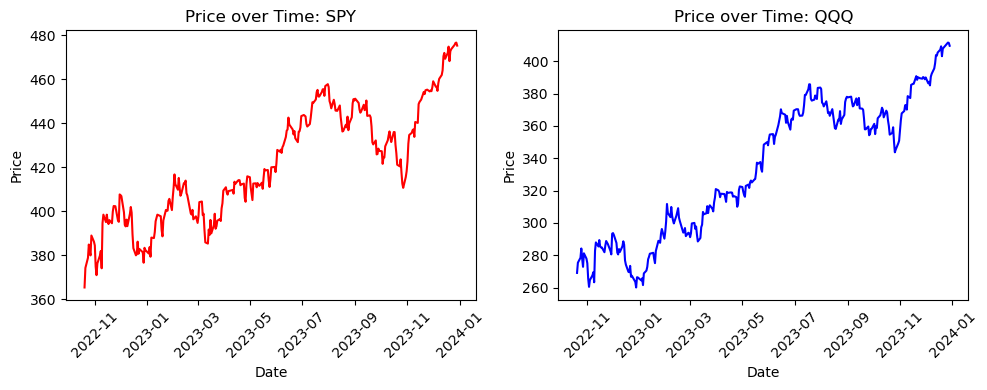

In [21]:

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# First subplot
axs[0].plot(ETF1_data.index, ETF1_data[COL], 'r')  # 'r' is the color red
axs[0].set_title('Price over Time: SPY')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Price')
axs[0].tick_params(axis='x', rotation=45)

# Second subplot
axs[1].plot(ETF2_data.index, ETF2_data[COL], 'b')  # 'b' is the color blue
axs[1].set_title('Price over Time: QQQ')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Price')
axs[1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

## Section 2: Moving Averages

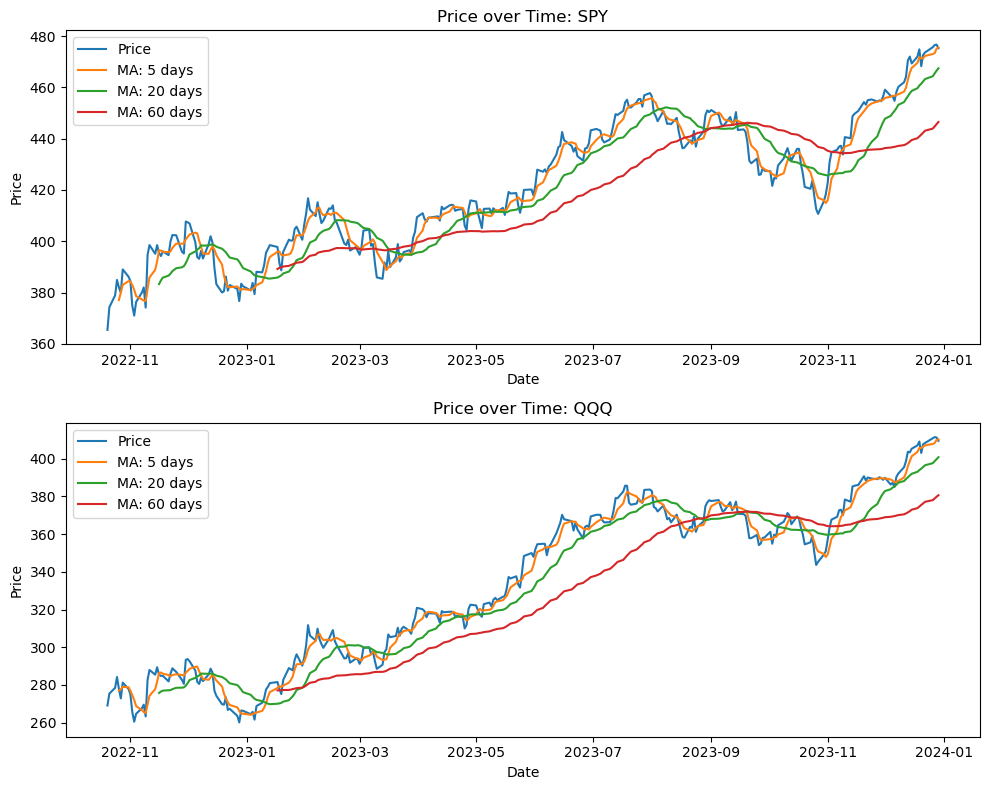

In [22]:
def get_moving_avg(df, col, lag):
    return df[col].rolling(window=lag).mean()

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

axs[0].plot(ETF1_data.index, ETF1_data[COL], label = 'Price')
axs[0].plot(get_moving_avg(ETF1_data, COL, 5), label = 'MA: 5 days')
axs[0].plot(get_moving_avg(ETF1_data, COL, 20), label = 'MA: 20 days')
axs[0].plot(get_moving_avg(ETF1_data, COL, 60), label = 'MA: 60 days')
axs[0].set_title('Price over Time: SPY')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Price')
axs[0].legend()

axs[1].plot(ETF2_data.index, ETF2_data[COL], label = 'Price')
axs[1].plot(get_moving_avg(ETF2_data, COL, 5), label = 'MA: 5 days')
axs[1].plot(get_moving_avg(ETF2_data, COL, 20), label = 'MA: 20 days')
axs[1].plot(get_moving_avg(ETF2_data, COL, 60), label = 'MA: 60 days')
axs[1].set_title('Price over Time: QQQ')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Price')
axs[1].legend()

plt.tight_layout()

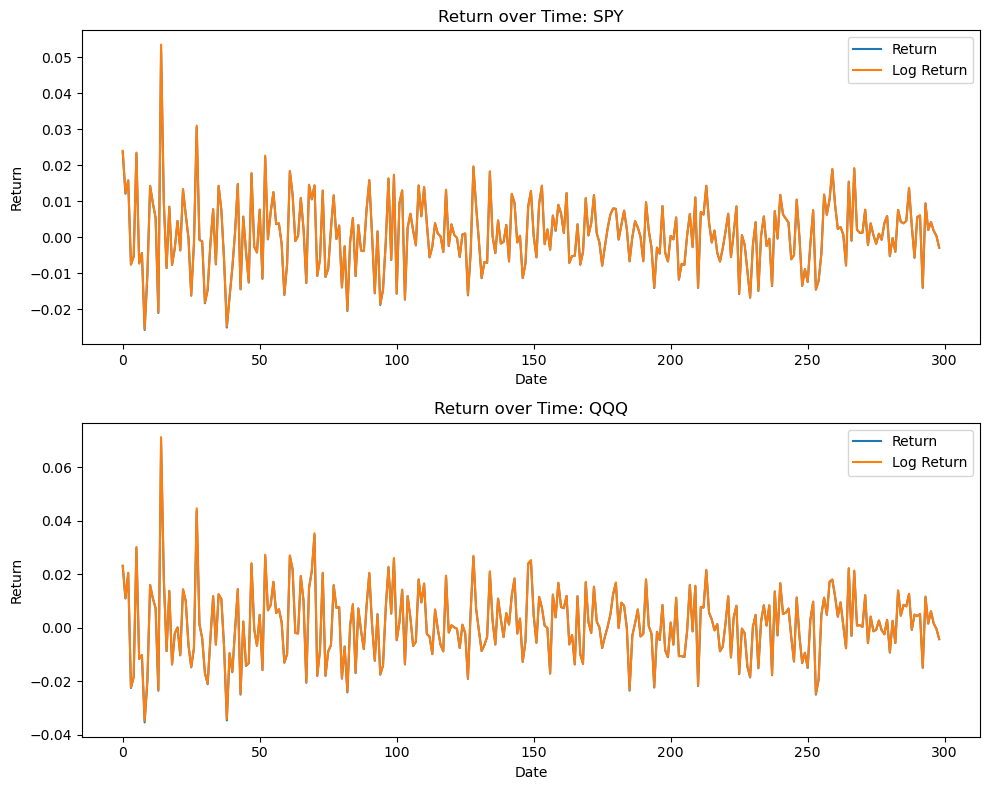

In [23]:
def get_return(data, col, log=False):
    
    if log:
        return np.log(np.array(data[col][1:]) / np.array(data[col][:-1]))
    else:
        return (np.array(data[col][1:]) - np.array(data[col][:-1]))/np.array(data[col][1:])


fig, axs = plt.subplots(2, 1, figsize = (10, 8))

axs[0].plot(get_return(ETF1_data, COL), label='Return')
axs[0].plot(get_return(ETF1_data, COL, log = True), label='Log Return')
axs[0].set_title(f'Return over Time: {ETF1}')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Return')
axs[0].legend()

axs[1].plot(get_return(ETF2_data, COL), label='Return')
axs[1].plot(get_return(ETF2_data, COL, log = True), label='Log Return')
axs[1].set_title(f'Return over Time: {ETF2}')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Return')
axs[1].legend()

plt.tight_layout()

In [24]:
from statsmodels.tsa.arima.model import ARIMA

def arima_model(df, col, order, show_summary = False):
    # endog: "endogenous variable," which refers to the main variable of interest in your time series analysis. 
    ARIMA_model = ARIMA(endog=df[col], order=order)
    results = ARIMA_model.fit()
    if show_summary:
        print(results.summary())
    return results


# ma_5 = arima_model(df=ETF1_data, col=COL, order=(0, 0, 5), show_summary=True)


## Section 3: Correlation Functions

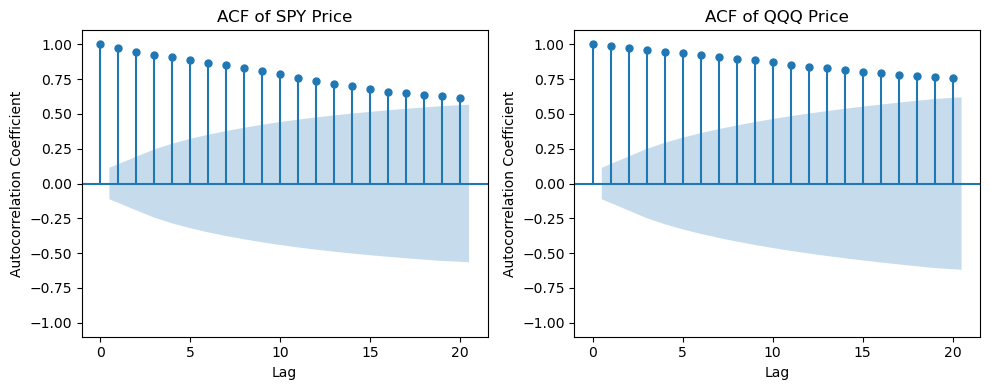

In [25]:
# Plot the ACF
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
plot_acf(ETF1_data[COL], lags=20, ax=axs[0])  # You can adjust the number of lags as needed
axs[0].set_title(f'ACF of {ETF1} Price')
axs[0].set_xlabel('Lag')
axs[0].set_ylabel('Autocorrelation Coefficient')
axs[0].set_ylim(-1.1, 1.1)

plot_acf(ETF2_data[COL], lags=20, ax=axs[1])  # You can adjust the number of lags as needed
axs[1].set_title(f'ACF of {ETF2} Price')
axs[1].set_xlabel('Lag')
axs[1].set_ylabel('Autocorrelation Coefficient')
axs[1].set_ylim(-1.1, 1.1)

plt.tight_layout()
plt.show()



/Users/chenkangan/tensorflow-test/env/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



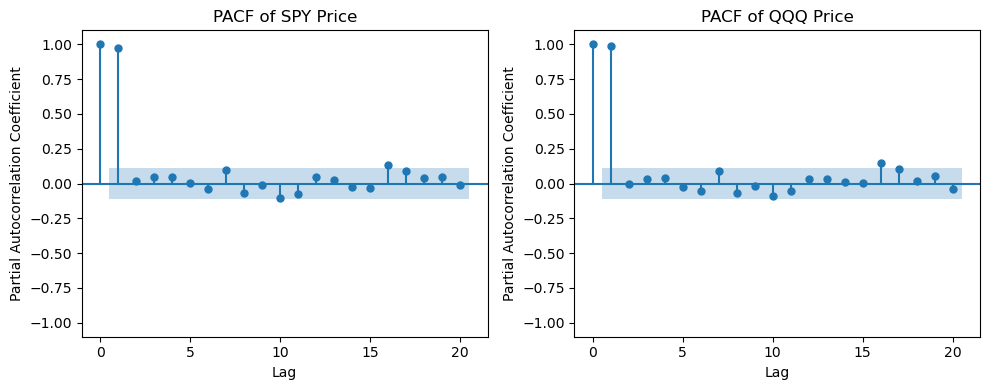

In [26]:
# Plot the ACF
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
plot_pacf(ETF1_data[COL], lags=20, ax=axs[0])  # You can adjust the number of lags as needed
axs[0].set_title(f'PACF of {ETF1} Price')
axs[0].set_xlabel('Lag')
axs[0].set_ylabel('Partial Autocorrelation Coefficient')
axs[0].set_ylim(-1.1, 1.1)

plot_pacf(ETF2_data[COL], lags=20, ax=axs[1])  # You can adjust the number of lags as needed
axs[1].set_title(f'PACF of {ETF2} Price')
axs[1].set_xlabel('Lag')
axs[1].set_ylabel('Partial Autocorrelation Coefficient')
axs[1].set_ylim(-1.1, 1.1)
plt.tight_layout()
plt.show()

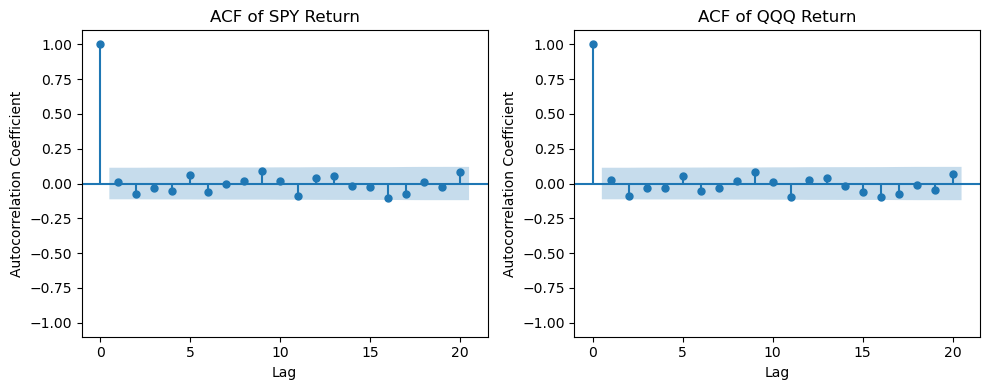

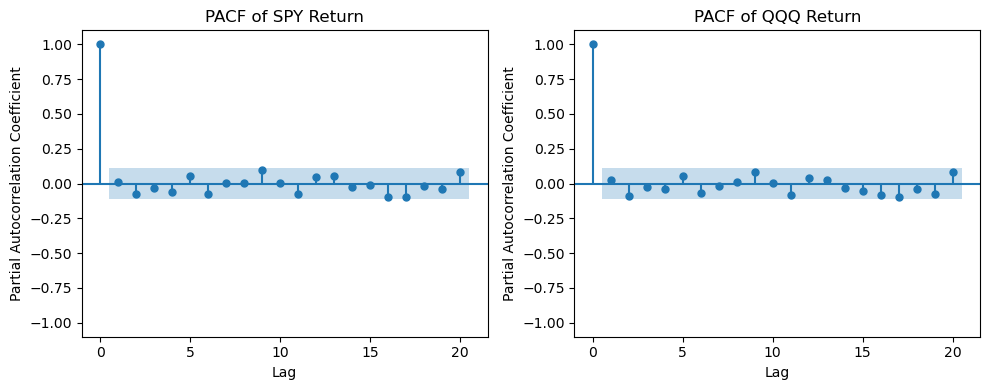

In [27]:


# Plot the ACF
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
plot_acf(get_return(ETF1_data, COL), lags=20, ax=axs[0])  # You can adjust the number of lags as needed
axs[0].set_title(f'ACF of {ETF1} Return')
axs[0].set_xlabel('Lag')
axs[0].set_ylabel('Autocorrelation Coefficient')
axs[0].set_ylim(-1.1, 1.1)

plot_acf(get_return(ETF2_data, COL), lags=20, ax=axs[1])  # You can adjust the number of lags as needed
axs[1].set_title(f'ACF of {ETF2} Return')
axs[1].set_xlabel('Lag')
axs[1].set_ylabel('Autocorrelation Coefficient')
axs[1].set_ylim(-1.1, 1.1)
plt.tight_layout()
plt.show()
    
# Plot the PACF
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
plot_pacf(get_return(ETF1_data, COL), lags=20, ax=axs[0])  # You can adjust the number of lags as needed
axs[0].set_title(f'PACF of {ETF1} Return')
axs[0].set_xlabel('Lag')
axs[0].set_ylabel('Partial Autocorrelation Coefficient')
axs[0].set_ylim(-1.1, 1.1)

plot_pacf(get_return(ETF2_data, COL), lags=20, ax=axs[1])  # You can adjust the number of lags as needed
axs[1].set_title(f'PACF of {ETF2} Return')
axs[1].set_xlabel('Lag')
axs[1].set_ylabel('Partial Autocorrelation Coefficient')
axs[1].set_ylim(-1.1, 1.1)
plt.tight_layout()
plt.show()

## Session 4: Gaussianity and Stationarity Test



In [28]:
# Test for Gaussianity using K-S test
ETF1_return = get_return(ETF1_data, COL)

# Perform the K-S test for normality
ks_statistic, p_value = stats.kstest(ETF1_return, 'norm', 
                                     args=(np.mean(ETF1_return), 
                                           np.std(ETF1_return, ddof=1)))

print(f"{ETF1} K-S statistic: {ks_statistic:4f}, p-value: {p_value:4f}")
print('P value greater than 0.05, thus fail to reject the null hypothesis.')

# Test for Gaussianity using K-S test
ETF2_return = get_return(ETF2_data, COL)

# Perform the K-S test for normality
ks_statistic, p_value = stats.kstest(ETF2_return, 'norm', 
                                     args=(np.mean(ETF2_return), 
                                           np.std(ETF2_return, ddof=1)))

print(f"{ETF2} K-S statistic: {ks_statistic:4f}, p-value: {p_value:4f}")
print('P value greater than 0.05, thus fail to reject the null hypothesis.')

SPY K-S statistic: 0.038794, p-value: 0.743965
P value greater than 0.05, thus fail to reject the null hypothesis.
QQQ K-S statistic: 0.037533, p-value: 0.778976
P value greater than 0.05, thus fail to reject the null hypothesis.


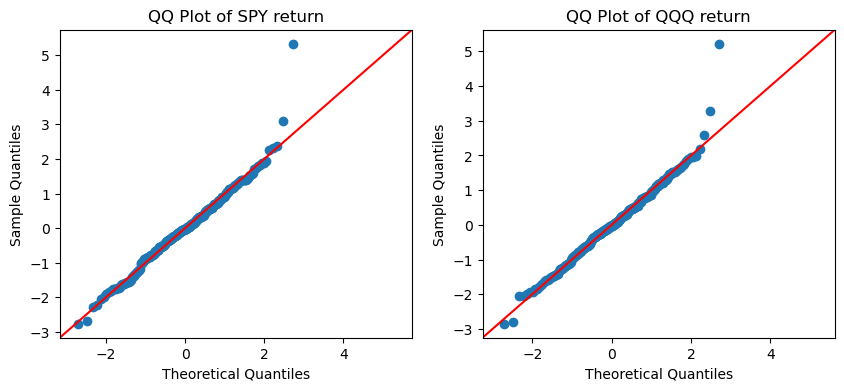

In [29]:
import statsmodels.api as sm
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
 # The 'line' parameter adds a reference line at 45 degrees which represents the theoretical normal distribution
sm.qqplot((ETF1_return-np.mean(ETF1_return))/np.std(ETF1_return), line ='45', ax = axs[0]) 
sm.qqplot((ETF2_return-np.mean(ETF2_return))/np.std(ETF2_return), line ='45', ax = axs[1]) 
axs[0].set_title(f'QQ Plot of {ETF1} return')
axs[1].set_title(f'QQ Plot of {ETF2} return')
plt.show()  # Display the plot